# Capstone Project

* Title: "Olist a Brazilian e-commerce"
* Author: "Sneha Rani Sarkar"

# Olist's Business Model

**[Olist](http://www.olist.com/)** is a **Brazilian** departmental store that **operates in e-commerce segment, but is not an e-commerce itself**. It operates as a SaaS (*Software as a Service*) technology company since 2015. It offers a marketplace solution (*of e-commerce segment*) to shopkeepers of all sizes (*and for most segments*) to increase their sales whether they have online presence or not. 

## Olist's Solution

Olist's solution consists of three aspects: Software, Contracts with the main marketplaces and Reputation sharing. The diagram below shows how Olist links marketplaces, consumers (*Portuguese: consumidores*), and retailers (*Portuguese: varejistas*)

## What Olist says?

Olist says she... 

1. ... is a large department store within marketplaces.
2. ... is connected to the main e-commerces of Brazil.
3. ... does not buy products. 
4. ... does not keep products in stock.
5. ... does not carry out shipping of any products offered in its store. 
6. All products are sold and shipped by the thousands of shopkeepers (**registered on Olist***) who sell through Olist.
7. Her strength lies in union of all participating shopkeepers, who are selling physical products. 
8. Participant shopkeeper is responsible for separating, packing, and taking products to the logistics operator.

**Please note Olist's perspective (a supply chain preview):** she prescribes there are many factors that can influence the sales of a shopkeeper e.g. type of product, demand, seasonality, competitive pricing, terms, inventory etc

In image below Olist describes (*in Portuguese*) how it differentiates itself from the other marketplaces based on reputation, product placements, dedicated teams to sales & customer service, reduced time to start selling, centralised control of operations and other competitive tools.


### Orders dataset
- Order ID
- Customer ID
- Order Status 
- Order Purchase Timestamp
- Order Approved at
- Order Delivered Carrier date
- Order Delivered Customer date

### Customers dataset
- Customer ID
- Customer Unique ID
- Customer Zip Code prefix
- Customer City
- Customer State

### Geolocation dataset
- Geolocation Zip Code prefix
- Geolocation Lat.
- Geolocation Lng.
- Geolocation City
- Geolocation State

### Items dataset
- Order ID
- Order Item ID
- Seller ID
- Shipping limit date
- Price
- Freight Value

### Payments dataset
- Order ID
- Payment Sequential 
- Payment Type
- Payment Installments
- Payment Value

### Products dataset
- Product ID
- Product Category name
- Product Name length
- Product Photos (quantity)
- Product Weight (grams)
- Product Length (cm)
- Product Height (cm)
- Product Width (cm)

### Reviews dataset
- Review ID
- Order ID
- Review Score
- Review Comment title
- Review Comment message
- Review Creation date
- Review Answer timestamp

### Sellers dataset
- Seller ID
- Seller Zip Code prefix
- Selller City
- Seller State


### Product Category translation dataset
- Product Category name (Portuguese)
- Product Category name (English)

In [1]:
#!pip install mysql-connector-python
#!pip install waterfallcharts

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import waterfall_chart
%matplotlib inline


In [3]:
try:
    # working in a local environment 
    # validating database,user, and password with MySQL workbench. 
    connection = mysql.connector.connect(host='localhost',    
                                         database='capstone1',
                                         user='root',
                                         password='12345')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to a Database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.29
You're connected to a Database:  ('capstone1',)


In [4]:
cust_data=pd.read_sql_query('SELECT * FROM olist_customers_dataset',connection)
geo_data=pd.read_sql_query('SELECT * FROM olist_geolocation_dataset',connection)
order_items=pd.read_sql_query('SELECT * FROM olist_order_items_dataset',connection)
order_payments=pd.read_sql_query('SELECT * FROM olist_order_payments_dataset',connection)
order_reviews=pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset',connection)
orders_data=pd.read_sql_query('SELECT * FROM olist_orders_dataset',connection)
products_data=pd.read_sql_query('SELECT * FROM olist_products_dataset',connection)
sellers_data=pd.read_sql_query('SELECT * FROM olist_sellers_dataset',connection)
product_translation=pd.read_sql_query('SELECT * FROM product_category_name_translation',connection)

C:\Users\Sarkar\AppData\Local\Temp/ipykernel_7020/2190985153.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cust_data=pd.read_sql_query('SELECT * FROM olist_customers_dataset',connection)
C:\Users\Sarkar\AppData\Local\Temp/ipykernel_7020/2190985153.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  geo_data=pd.read_sql_query('SELECT * FROM olist_geolocation_dataset',connection)
C:\Users\Sarkar\AppData\Local\Temp/ipykernel_7020/2190985153.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_items=pd.read_sql_query

In [5]:
if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

MySQL connection is closed


In [6]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders_data.shape

(99441, 8)

In [8]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'], errors='coerce')
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'], errors='coerce')
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'], errors='coerce')
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'], errors='coerce')
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'], errors='coerce')

In [10]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# orders_data
* In the main data base order dataset is the base dataset which captures the transactions of the orders placed,confirmation and order delivery 
* Thus extracting a few columns such as 
    1. Est_Lead_t--> estimated lead time--is the estimated total time for a product to reach customer after placing the order
    2. Act_Lead_t--> actual lead time--is the actual total time for a product to reach customer after placing the order
    3. Approval_mins--> minutes taken by the platform to confirm the purchase
    4. Appr_to_Carrier-->time take for the product to reach the carrier after the confirmation of the product purchase
    5. Carrier_to_Cust-->total time taken for the product to be delivered to the customer by the carrier
* Actual lead time is the total sum of Approval_to_Carrier and Carrier_to_Customer thus high correlation
* purchase_month--> columns provide the information of the month when the order is placed
* purchase_year--> the data set contains the total product purchase over a period of 3 year i.e., 2016-2018
* purchase_quart--> columns provide the information of the quarter of the years 2016-2018

In [11]:
orders_data['Est_Lead_t'] = (orders_data['order_estimated_delivery_date'] - orders_data['order_purchase_timestamp']).dt.days
orders_data['Act_Lead_t'] = (orders_data['order_delivered_customer_date'] - orders_data['order_purchase_timestamp']).dt.days
orders_data['Approval_mins'] = round((orders_data['order_approved_at'] - orders_data['order_purchase_timestamp']).dt.total_seconds()/60,2)
orders_data['Appr_to_Carrier'] = (orders_data['order_delivered_carrier_date'] - orders_data['order_purchase_timestamp']).dt.days
orders_data['Carrier_to_Cust'] = (orders_data['order_delivered_customer_date'] - orders_data['order_delivered_carrier_date']).dt.days

In [12]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Est_Lead_t,Act_Lead_t,Approval_mins,Appr_to_Carrier,Carrier_to_Cust
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,8.0,10.70,2.0,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19,13.0,1842.83,1.0,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,9.0,16.57,0.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,13.0,17.88,3.0,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,2.0,61.83,0.0,1.0


In [13]:
orders_data['purchase_month'] = (orders_data['order_purchase_timestamp']).dt.month
orders_data['purchase_year'] =(orders_data['order_purchase_timestamp']).dt.year

In [14]:
# Quarter 1 = 1st January to 31st March
# Quarter 2 = 1st April to 30th June
# Quarter 3 = 1st July to 30th September
# Quarter 4 = 1st October to 31st December
orders_data['purchase_quart'] = pd.PeriodIndex(orders_data['order_purchase_timestamp'], freq='Q')

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
order_items.shape

(112650, 7)

In [17]:
order_items["order_price"] = (order_items["order_item_id"]*order_items["price"])
order_items["order_freight"] = (order_items["order_item_id"]*order_items["freight_value"])
order_items["total_order_cost"] = (order_items["order_price"] + order_items["order_freight"])

In [18]:
fr_sup_pr=[]
for i in range(0,len(order_items["order_freight"])):
    if order_items["freight_value"][i] >=order_items["price"][i]:
        fr_sup_pr.append(1)
    else:
        fr_sup_pr.append(0)

In [19]:
order_items["fr_sup_pr"]=fr_sup_pr

In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_price,order_freight,total_order_cost,fr_sup_pr
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04,0


In [21]:
order_items["fr_sup_pr"].value_counts()

0    108526
1      4124
Name: fr_sup_pr, dtype: int64

* by the above observation we can conclude that the frieght price for a few products(4124) is greater than the net price of the product which is not favorable for an e-commerce website as it can cause a huge possiblity for customer churn

### Stimulation as *ƒ(Customers, Product Categories, Sellers)*
* Olist has been stimultated by addition of Customers, Product Catgories, and Sellers. As per the data, there has been a steady stream of customers and sellers getting registered on Olist's platform. This progress, in conjunction with regular increase in number of new product categories being offered has maintained Olist's growth momentum.


### Galvanisation by Product Categories

* In my opinion, addition of +50 (*approximate*) New Product Categories per month - *as an offer* - has galvanised the spurt in new customers getting registered. Consistency in this phenomenon was Olist's byword for 20 months i.e. from January 2017 to August 2018.


In [22]:
Cust_gr = pd.merge(orders_data,cust_data, left_on = "customer_id", right_on = "customer_id", how = 'inner')

In [23]:
Cust_gr.shape

(99441, 20)

In [24]:
Cust_gr.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Est_Lead_t', 'Act_Lead_t', 'Approval_mins', 'Appr_to_Carrier',
       'Carrier_to_Cust', 'purchase_month', 'purchase_year', 'purchase_quart',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

# Cohort Analysis

In [25]:
dumy=Cust_gr.copy()

In [26]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

dumy["Month_year_1day"]=dumy["order_purchase_timestamp"].apply(get_month)
dumy.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Est_Lead_t,Act_Lead_t,...,Appr_to_Carrier,Carrier_to_Cust,purchase_month,purchase_year,purchase_quart,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month_year_1day
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,18,8.0,...,1.0,7.0,3,2017,2017Q1,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,23,22.0,...,1.0,20.0,2,2018,2018Q1,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,30,24.0,...,1.0,23.0,8,2017,2017Q3,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37,17.0,...,3.0,13.0,1,2018,2018Q1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-01
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,25,7.0,...,1.0,6.0,3,2018,2018Q1,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,2018-03-01


In [27]:
#create a column index with the minimum date aka first time customer was acquired
dumy["Cohort_month"]=dumy.groupby("customer_unique_id")["Month_year_1day"].transform("min")

In [28]:
#create a data element function to get a series for substraction

def get_data_elements(df,column):
    day=df[column].dt.day
    month=df[column].dt.month
    year=df[column].dt.year
    return day,month,year

In [29]:
_,cohort_month,cohort_year=get_data_elements(dumy,'Cohort_month')

In [30]:
#create a cohort index
year_diff=dumy["purchase_year"]-cohort_year
month_diff=dumy["purchase_month"]-cohort_month
dumy["cohot_index"]=year_diff*12+month_diff+1

In [31]:
#count the customer ID by grouping by cohort month and cohort index

cohort_data=dumy.groupby(["Cohort_month","cohot_index"])["customer_unique_id"].nunique().reset_index()

In [32]:
cohort_data['year']=cohort_data['Cohort_month'].dt.year

In [33]:
cohort_data['Cohort_month']=cohort_data['Cohort_month'].astype(str)

In [34]:
cohort_data['year'].value_counts()

2017    171
2018     42
2016     12
Name: year, dtype: int64

In [35]:
df_year=(pd.DataFrame(cohort_data.groupby('year')['customer_unique_id'].sum()).reset_index())

In [36]:
df_year["year"]=df_year["year"].astype(str)

In [37]:
df_year

,year,customer_unique_id
0,2016,337
1,2017,45062
2,2018,52647


In [38]:
df_cohort=(pd.DataFrame(cohort_data.groupby(['Cohort_month'])['customer_unique_id'].sum()).reset_index())

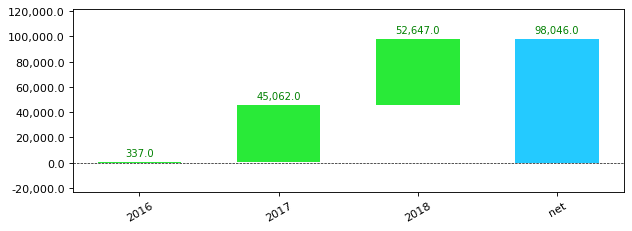

In [39]:
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':80})
waterfall_chart.plot(df_year['year'],df_year['customer_unique_id'])
plt.show()

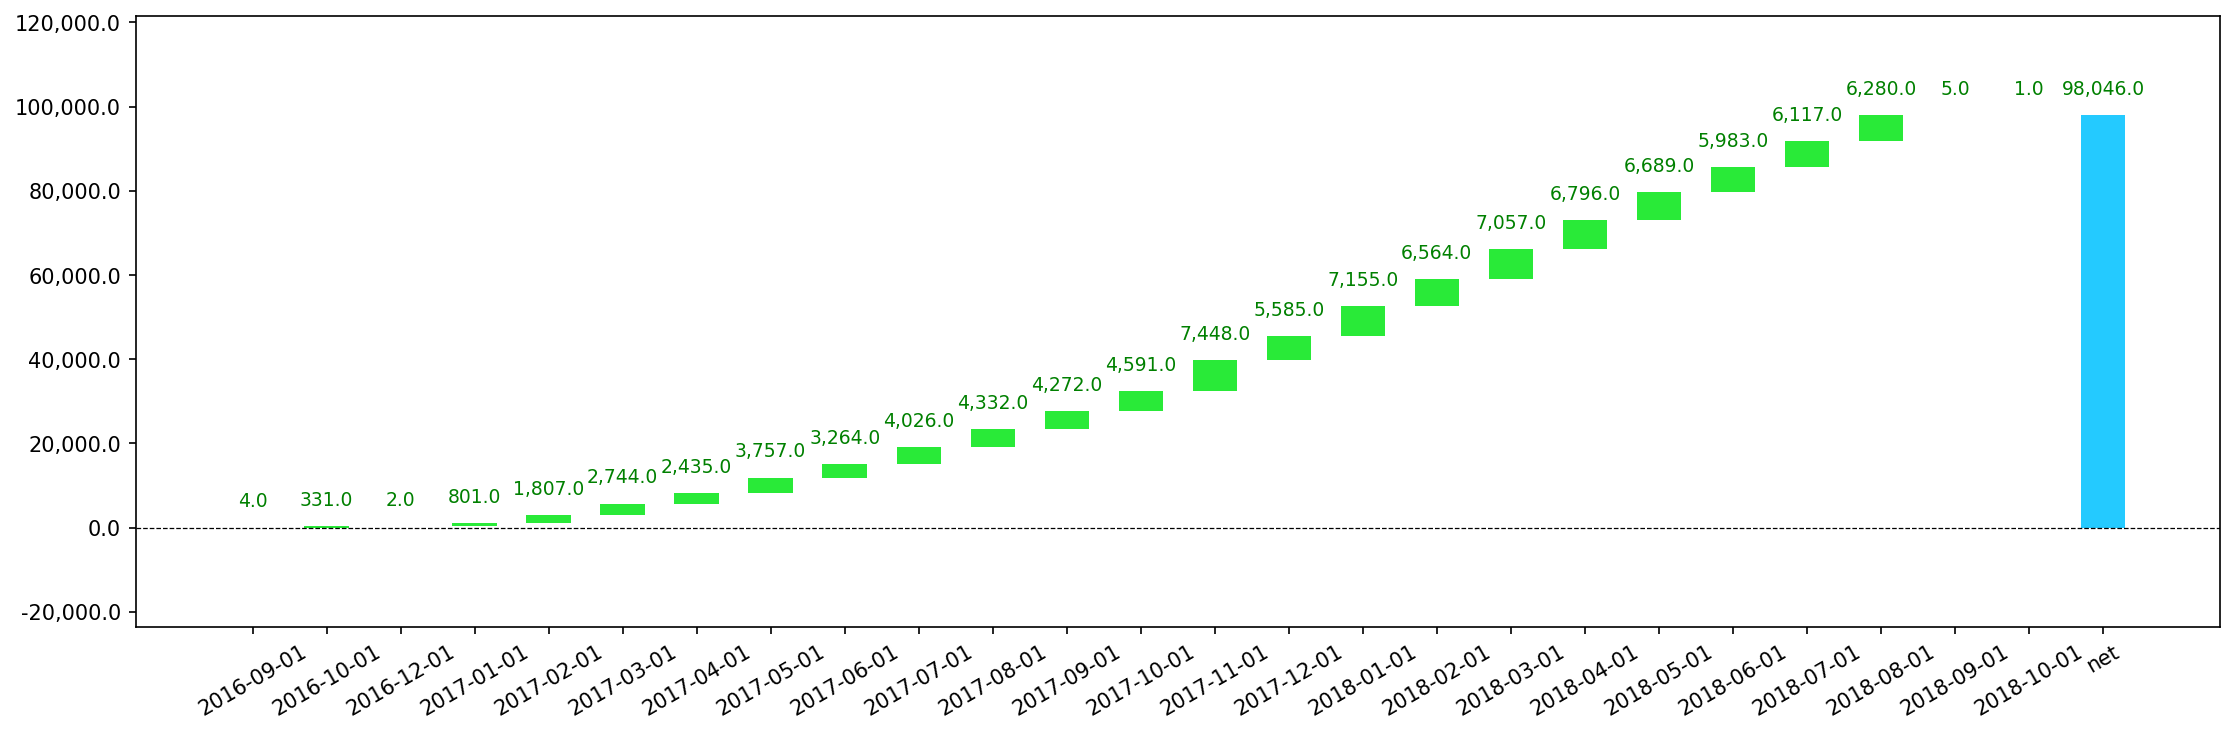

In [40]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':150})
waterfall_chart.plot(df_cohort['Cohort_month'], df_cohort['customer_unique_id'])
plt.show()

In [41]:
cohort_2016=cohort_data[cohort_data['year']==2016]
cohort_2017=cohort_data[cohort_data['year']==2017]
cohort_2018=cohort_data[cohort_data['year']==2018]

In [42]:
cohort_2016_1=(pd.DataFrame(cohort_2016.groupby(['Cohort_month'])['customer_unique_id'].sum()).reset_index())
cohort_2017_1=(pd.DataFrame(cohort_2017.groupby(['Cohort_month'])['customer_unique_id'].sum()).reset_index())
cohort_2018_1=(pd.DataFrame(cohort_2018.groupby(['Cohort_month'])['customer_unique_id'].sum()).reset_index())

In [43]:
from waterfall_ax import WaterfallChart

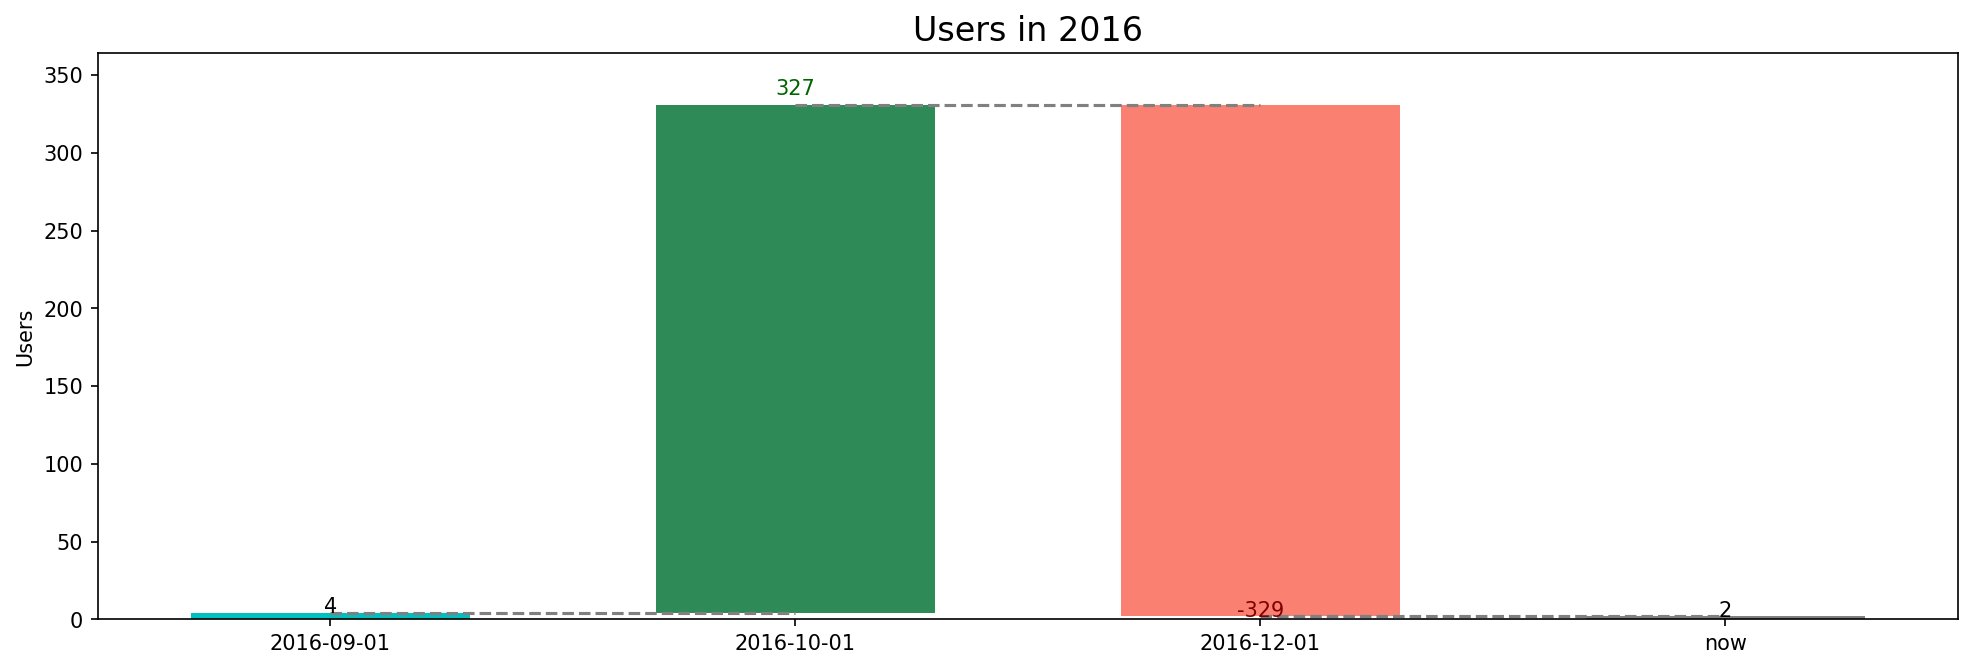

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
waterfall = WaterfallChart(
    cohort_2016_1['customer_unique_id'].to_list(),
    step_names=cohort_2016_1['Cohort_month'].to_list(), 
    metric_name="Users", 
    last_step_label="now")
wf_ax = waterfall.plot_waterfall(ax=ax, title="Users in 2016")

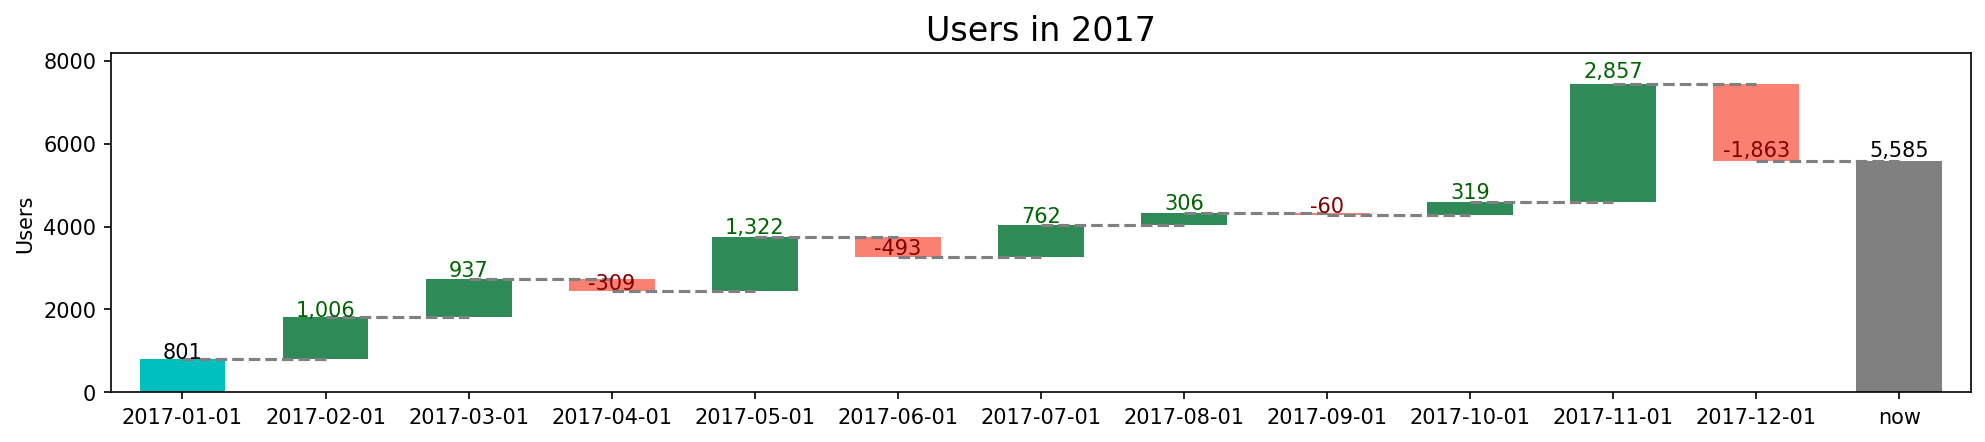

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
waterfall = WaterfallChart(
    cohort_2017_1['customer_unique_id'].to_list(),
    step_names=cohort_2017_1['Cohort_month'].to_list(), 
    metric_name="Users", 
    last_step_label="now")
wf_ax = waterfall.plot_waterfall(ax=ax, title="Users in 2017")

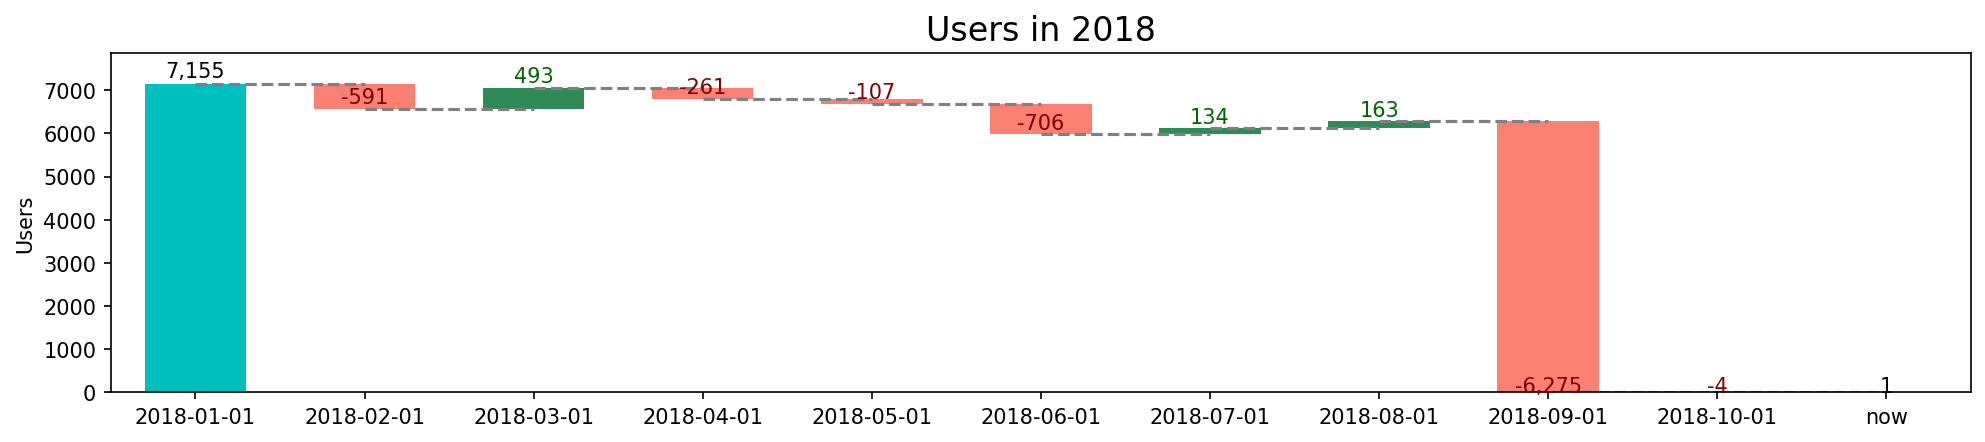

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
waterfall = WaterfallChart(
    cohort_2018_1['customer_unique_id'].to_list(),
    step_names=cohort_2018_1['Cohort_month'].to_list(), 
    metric_name="Users", 
    last_step_label="now")
wf_ax = waterfall.plot_waterfall(ax=ax, title="Users in 2018")

* Trend of New Customers' registration
The graph shows, in 2017, there has been a positive trend line in number of New Customers [**Customer Unique Identity**] getting registered with Olist. In 2018, more than 6000 were getting registered every month.

In [47]:
products_data=pd.merge(products_data,product_translation, left_on = "product_category_name", right_on = "ï»¿product_category_name", how = 'left')
products_data.drop(columns=["ï»¿product_category_name"],inplace=True)
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14,perfumery\r
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20,art\r
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15,sports_leisure\r
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26,baby\r
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13,housewares\r


In [48]:
order_items=pd.merge(order_items,products_data, left_on = "product_id", right_on = "product_id", how = 'left')

In [49]:
Product_Gr = pd.merge(orders_data,order_items, left_on = "order_id", right_on = "order_id", how = 'inner')

In [50]:
Product_Gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   Est_Lead_t                     112650 non-null  int64         
 9   Act_Lead_t                     110196 non-null  float64       
 10  Approval_mins                  112635 non-null  float64       
 11  

In [51]:
dumy1=Product_Gr.copy()

In [52]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

dumy1["Month_year_1day"]=dumy1["order_purchase_timestamp"].apply(get_month)
dumy1.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Est_Lead_t,Act_Lead_t,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Month_year_1day
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,23,22.0,...,bebes,52,828,4,4950,40,10,40,baby\r,2018-02-01
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,30,24.0,...,eletrodomesticos_2,51,500,2,13300,32,90,22,home_appliances_2\r,2017-08-01
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37,17.0,...,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories\r,2018-01-01
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37,17.0,...,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories\r,2018-01-01
112649,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,25,7.0,...,beleza_saude,45,569,1,150,16,7,15,health_beauty\r,2018-03-01


In [53]:
dumy1["Cat_month_add"]=dumy1.groupby("product_category_name_english")["Month_year_1day"].transform("min")
dumy1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Est_Lead_t,Act_Lead_t,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Month_year_1day,Cat_month_add
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,8.0,...,40,268,4,500,19,8,13,housewares\r,2017-10-01,2016-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19,13.0,...,29,178,1,400,19,13,19,perfumery\r,2018-07-01,2016-10-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,9.0,...,46,232,1,420,24,19,21,auto\r,2018-08-01,2016-10-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,13.0,...,59,468,3,450,30,10,20,pet_shop\r,2017-11-01,2016-10-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,2.0,...,38,316,4,250,51,15,15,stationery\r,2018-02-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,23,22.0,...,52,828,4,4950,40,10,40,baby\r,2018-02-01,2016-10-01
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,30,24.0,...,51,500,2,13300,32,90,22,home_appliances_2\r,2017-08-01,2017-01-01
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37,17.0,...,59,1893,1,6550,20,20,20,computers_accessories\r,2018-01-01,2016-10-01
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37,17.0,...,59,1893,1,6550,20,20,20,computers_accessories\r,2018-01-01,2016-10-01


In [54]:
dumy12=pd.DataFrame((dumy1.groupby(["Cat_month_add"])["product_category_name_english"].nunique())).sort_values(by=["Cat_month_add"],ascending=False).reset_index()

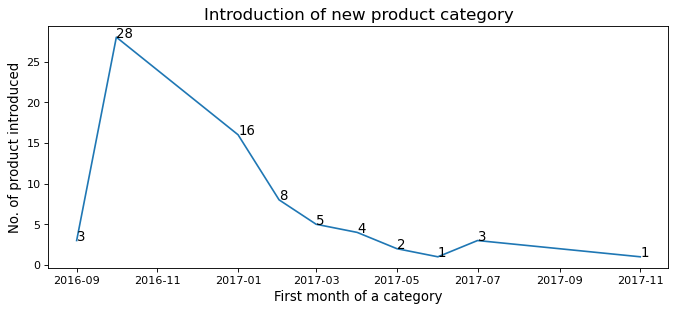

In [55]:
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':80})
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(dumy12["Cat_month_add"],dumy12["product_category_name_english"])
plt.xlabel("First month of a category", size=12)
plt.ylabel("No. of product introduced", size=12)
plt.title("Introduction of new product category", size=15)
for index in range(len(dumy12["Cat_month_add"])):
    ax.text(dumy12["Cat_month_add"][index], dumy12["product_category_name_english"][index], dumy12["product_category_name_english"][index], size=12)
plt.show()


In [56]:
prod_gal=pd.DataFrame((Product_Gr.groupby(["purchase_year","purchase_month"])["product_category_name_english"].nunique()).reset_index().sort_values(["purchase_year"],ascending=True))

In [57]:
prod_gal["date"]=pd.to_datetime(prod_gal["purchase_month"].astype(str)+"-"+prod_gal["purchase_year"].astype(str))

In [58]:
prod_gal_16=prod_gal[(prod_gal["purchase_year"]==2016)]
prod_gal_17=prod_gal[(prod_gal["purchase_year"]==2017)].sort_values(["purchase_month"])
prod_gal_18=prod_gal[(prod_gal["purchase_year"]==2018)].sort_values(["purchase_month"])

In [59]:
prod_gal_17

,purchase_year,purchase_month,product_category_name_english,date
3,2017,1,43,2017-01-01
4,2017,2,51,2017-02-01
5,2017,3,53,2017-03-01
6,2017,4,57,2017-04-01
7,2017,5,58,2017-05-01
8,2017,6,59,2017-06-01
9,2017,7,61,2017-07-01
10,2017,8,63,2017-08-01
11,2017,9,65,2017-09-01
12,2017,10,63,2017-10-01


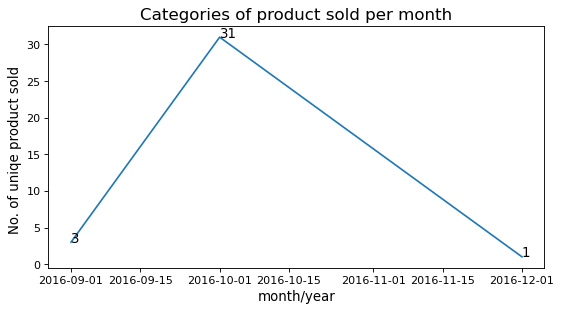

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(prod_gal_16["date"],prod_gal_16["product_category_name_english"])
plt.xlabel("month/year",size=12)
plt.ylabel("No. of uniqe product sold ", size=12)
plt.title("Categories of product sold per month", size=15)
for i in range(len(prod_gal_16["date"])):
    ax.text(prod_gal_16["date"][i],prod_gal_16["product_category_name_english"][i],prod_gal_16["product_category_name_english"][i],size=12)
plt.show()


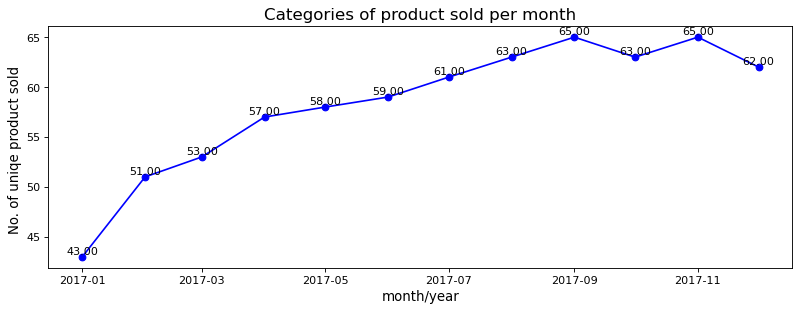

In [61]:
plt.figure(figsize=(12,4))
plt.plot(prod_gal_17["date"],prod_gal_17["product_category_name_english"],'bo-')
for x,y in zip(prod_gal_17["date"],prod_gal_17["product_category_name_english"]):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,2), ha='center') 
plt.xlabel("month/year",size=12)
plt.ylabel("No. of uniqe product sold ",size=12)
plt.title("Categories of product sold per month",size=15)
plt.show()

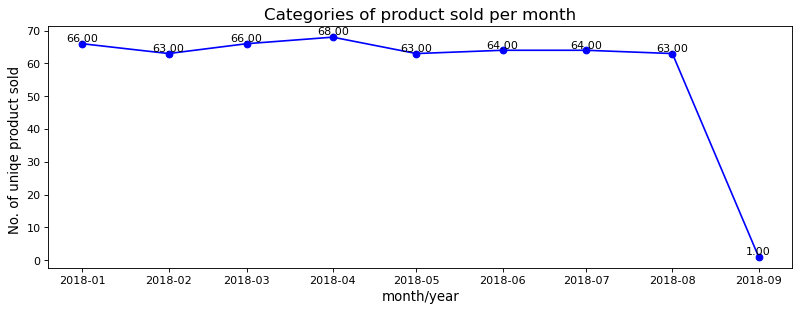

In [62]:
plt.figure(figsize=(12,4))
plt.plot(prod_gal_18["date"],prod_gal_18["product_category_name_english"],'bo-')
for x,y in zip(prod_gal_18["date"],prod_gal_18["product_category_name_english"]):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,2), ha='center') 
plt.xlabel("month/year",size=12)
plt.ylabel("No. of uniqe product sold ",size=12)
plt.title("Categories of product sold per month",size=15)
plt.show()

In [63]:
Seller_Gr=pd.merge(orders_data,pd.merge(order_items,sellers_data,left_on = "seller_id", right_on = "seller_id", how = 'left'), left_on = "order_id", right_on = "order_id", how = 'inner')

In [64]:
Seller_Gr.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Est_Lead_t', 'Act_Lead_t', 'Approval_mins', 'Appr_to_Carrier',
       'Carrier_to_Cust', 'purchase_month', 'purchase_year', 'purchase_quart',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'order_price', 'order_freight',
       'total_order_cost', 'fr_sup_pr', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [65]:
Seller_gal=pd.DataFrame((Seller_Gr.groupby(["purchase_year","purchase_month"])["seller_id"].nunique()).reset_index().sort_values(["purchase_year"],ascending=True))
Seller_gal["date"]=pd.to_datetime(prod_gal["purchase_month"].astype(str)+"-"+prod_gal["purchase_year"].astype(str))
Seller_gal

,purchase_year,purchase_month,seller_id,date
0,2016,9,3,2016-09-01
1,2016,10,143,2016-10-01
2,2016,12,1,2016-12-01
14,2017,12,861,2017-12-01
13,2017,11,965,2017-11-01
12,2017,10,776,2017-10-01
10,2017,8,708,2017-08-01
9,2017,7,606,2017-07-01
11,2017,9,731,2017-09-01
7,2017,5,583,2017-05-01


In [66]:
Seller_gal_16=Seller_gal[(Seller_gal["purchase_year"]==2016)]
Seller_gal_17=Seller_gal[(Seller_gal["purchase_year"]==2017)].sort_values(["purchase_month"])
Seller_gal_18=Seller_gal[(Seller_gal["purchase_year"]==2018)].sort_values(["purchase_month"])

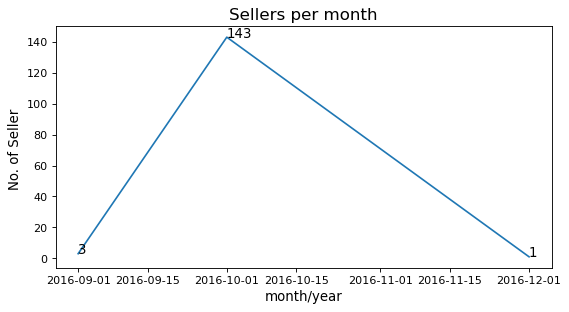

In [67]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(Seller_gal_16["date"],Seller_gal_16["seller_id"])
plt.xlabel("month/year",size=12)
plt.ylabel("No. of Seller ", size=12)
plt.title("Sellers per month", size=15)
for i in range(len(Seller_gal_16["date"])):
    ax.text(Seller_gal_16["date"][i],Seller_gal_16["seller_id"][i],Seller_gal_16["seller_id"][i],size=12)
plt.show()

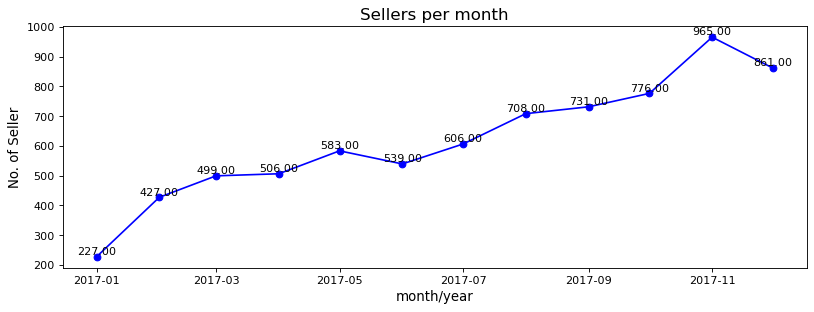

In [68]:
plt.figure(figsize=(12,4))
plt.plot(Seller_gal_17["date"],Seller_gal_17["seller_id"],'bo-')
for x,y in zip(Seller_gal_17["date"],Seller_gal_17["seller_id"]):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,2), ha='center') 
plt.xlabel("month/year",size=12)
plt.ylabel("No. of Seller",size=12)
plt.title("Sellers per month",size=15)
plt.show()

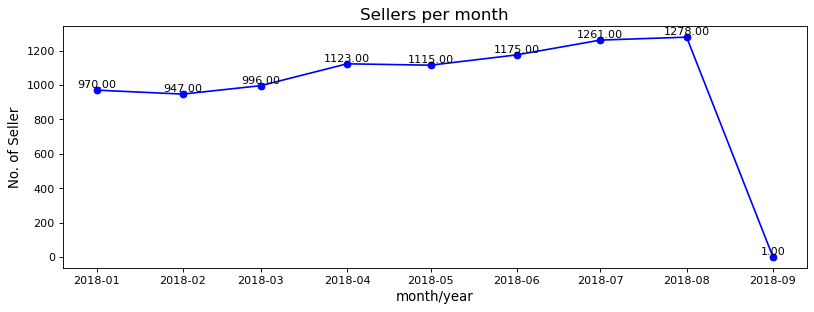

In [69]:
plt.figure(figsize=(12,4))
plt.plot(Seller_gal_18["date"],Seller_gal_18["seller_id"],'bo-')
for x,y in zip(Seller_gal_18["date"],Seller_gal_18["seller_id"]):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points",xytext=(0,2), ha='center') 
plt.xlabel("month/year",size=12)
plt.ylabel("No. of Seller",size=12)
plt.title("Sellers per month",size=15)
plt.show()

### Fast Moving product categories
* Buoyancy of Product Categories can be gauged from the fact how frequently a Product Category has been purchased by customers? OR which are the customer driven “FAST MOVING” product categories? This kernel of information may act as one of the parameters which a company (*and in this case Olist*) may probably use for portfolio building. 
* This data model has information of 100k orders. Therefore, taking a cue from quartile distribution of data, I have further divided it into 6 sub—sections. This helped me visually determine (*in unscientific form*) which Product Categories were Fast Moving as per each sub—section. 

## Purchase made multiple times 

Lets first start with the case where all Product Categories were purchased multiple times. The graph below shows which categories are high frequency categories.

**Please Note:** It excludes all the categories that were purchased as: one product category per month per year.

In [92]:
max_prod=pd.DataFrame(Product_Gr.groupby(['purchase_year',"product_category_name_english"])["product_category_name"].count()).reset_index()

In [108]:
max_prod1=max_prod[(max_prod["product_category_name"]>1)]

In [117]:
cols = ["product_category_name_english"]
max_prod1[cols]=max_prod1[cols].fillna('N/A')

C:\Users\Sarkar\AppData\Local\Temp/ipykernel_7020/597226104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_prod1[cols]=max_prod1[cols].fillna('N/A')


In [118]:
#df_pro = 
max_prod1.pivot(index=max_prod1['product_category_name_english'], columns=max_prod1["purchase_year"], values=max_prod1['product_category_name'])

KeyError: 'auto\r'

In [109]:
max_prod1_2016=max_prod1[(max_prod1["purchase_year"]==2016)]
max_prod1_2017=max_prod1[(max_prod1["purchase_year"]==2017)]
max_prod1_2018=max_prod1[(max_prod1["purchase_year"]==2018)]

In [113]:
max_prod1_2017

,purchase_year,product_category_name_english,product_category_name
36,2017,auto\r,1604
37,2017,baby\r,1275
38,2017,bed_bath_table\r,5223
46,2017,computers_accessories\r,3098
47,2017,consoles_games\r,707
51,2017,cool_stuff\r,2315
57,2017,electronics\r,902
59,2017,fashion_bags_accessories\r,1141
70,2017,furniture_decor\r,4147
73,2017,garden_tools\r,2463


C:\Users\Sarkar\AppData\Local\Temp/ipykernel_7020/1012426022.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(max_prod1_2017["product_category_name_english"],max_prod1_2017["product_category_name"],'bo-',color="red")
C:\Users\Sarkar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sarkar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


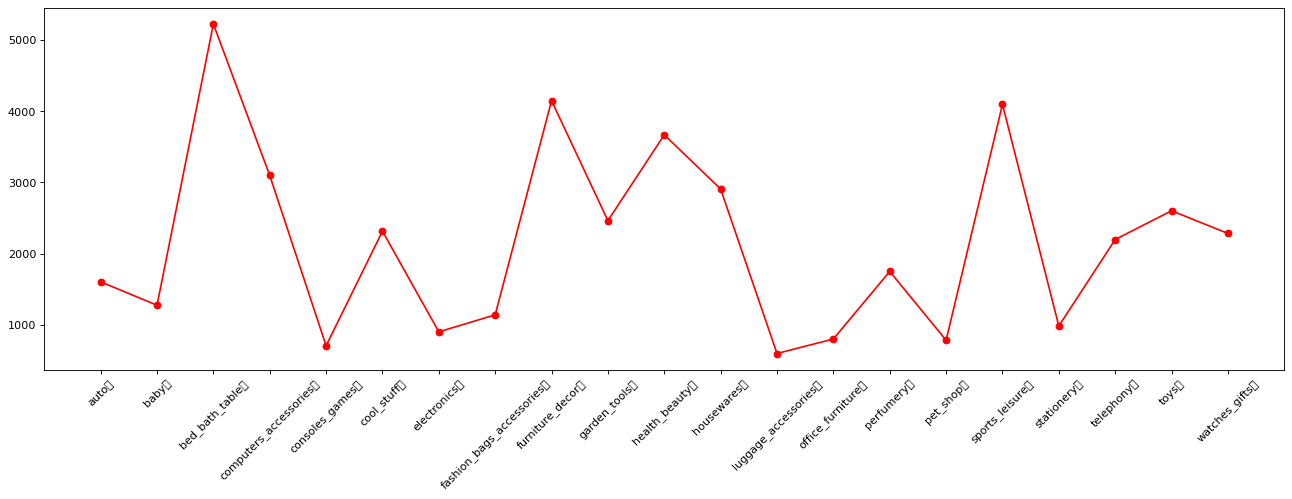

In [111]:
plt.figure(figsize=(20,6))
#plt.plot(max_prod1_2018["product_category_name_english"],max_prod1_2018["product_category_name"],'bo-')
plt.plot(max_prod1_2017["product_category_name_english"],max_prod1_2017["product_category_name"],'bo-',color="red")
#plt.plot(max_prod1_2016["product_category_name_english"],max_prod1_2016["product_category_name"],'bo-',color="green")
plt.xticks(rotation=45)
plt.show()

### One Order per Product Category
Case where only one order was placed for one product category in a month and in a given year.

In [ ]:
# cust_data*
# geo_data
# order_items *
# order_payments
# order_reviews
# orders_data*
# products_data*
# sellers_data
# product_translation*

## k - means Clustering {.tabset .tabset-fade .tabset-pills}

There is no scientific method used to calcuate number of clusters. I plugged in 6 as number of centers, to keep things even numbered. 
First, a big table has been created that contained all relevent features from all data sets (*at least from my analysis point of view*). I did various premutations and combinations to come up with most significant features that may maintain approximately same number of tuples in each cluster. This exercise gave me following features, whose values were first normalised and then they act as back bone of my clusters.

- **Actual Lead Time (days):** Number of days taken to deliver a product to the customer, from the moment an order has been placed in the system.
- **Order ID:** Identification of order.
- **Approval time (mins):** Time taken by Olist's system to approve an order after an order has been placed and before it's intimated to supplier/carrier.
- **Order Item ID:** Number of Items/Order.
- **Price:** Price/Item, charged from a customer.
- **Freight Value:** Dellivery Cost/Item, charged from a customer
- **Product Weight (gms):** Weight of the product in grams

**Please Note:** Price & Freight Value is amount charged per item and is not per order. Plus, an order may have more than one item.


In [120]:
# Total.Gr <- inner_join(Seller.Gr, Customers, by ="customer_id")

# Tot.Gr <- na.omit(Total.Gr)
# Tot.Gr2 <- Tot.Gr %>% select_at(vars(order_id, Act.Lead.t, Approval.mins, order_item_id, price, freight_value ,product_weight_g))

Total_Gr=pd.merge(Seller_Gr,cust_data,how="inner",on="customer_id")

In [121]:
Total_Gr.shape

(112650, 42)

In [123]:
Total_Gr.dropna(inplace=True)

In [124]:
Total_Gr.shape

(108622, 42)

In [125]:
Total_Gr.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Est_Lead_t', 'Act_Lead_t', 'Approval_mins', 'Appr_to_Carrier',
       'Carrier_to_Cust', 'purchase_month', 'purchase_year', 'purchase_quart',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'order_price', 'order_freight',
       'total_order_cost', 'fr_sup_pr', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [130]:
Total_Gr.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
Est_Lead_t,108622.0,23.445011,8.836702,2.00,6.00,7.00,9.00,9.00,10.00,18.00,23.00,28.0000,38.0000,40.0000,42.0000,45.0000,50.0000,155.00
Act_Lead_t,108622.0,12.003692,9.440769,0.00,1.00,2.00,2.00,2.00,2.00,6.00,10.00,15.0000,29.0000,31.0000,34.0000,38.0000,45.0000,209.00
Approval_mins,108622.0,631.568401,1260.207129,0.00,0.00,7.18,7.78,8.28,8.68,13.00,21.07,911.0175,2922.6250,3389.1828,3897.1374,4607.8396,5416.8355,44486.62
Appr_to_Carrier,108622.0,2.788247,3.643680,-172.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.0000,9.0000,10.0000,11.0000,13.0000,17.0000,107.00
Carrier_to_Cust,108622.0,8.736333,8.608997,-17.00,0.00,0.00,1.00,1.00,1.00,4.00,7.00,11.0000,23.0000,26.0000,28.0000,33.0000,40.0000,205.00
purchase_month,108622.0,6.037120,3.224480,1.00,1.00,1.00,1.00,1.00,1.00,3.00,6.00,8.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.00
purchase_year,108622.0,2017.546114,0.503772,2016.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2018.00,2018.0000,2018.0000,2018.0000,2018.0000,2018.0000,2018.0000,2018.00
order_item_id,108622.0,1.198643,0.708592,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0000,2.0000,2.0000,3.0000,3.0000,4.0000,21.00
price,108622.0,120.078147,182.071976,0.85,9.99,12.90,13.99,15.55,17.37,39.90,74.90,134.9000,349.0000,395.6500,493.0000,610.0000,887.0000,6735.00
freight_value,108622.0,19.982858,15.734239,0.00,4.33,7.39,7.42,7.71,7.78,13.08,16.29,21.1600,45.1000,50.5000,56.9237,64.7400,83.8300,409.68


In [132]:
out=Total_Gr[["product_weight_g","Approval_mins"]]
not_out=Total_Gr.drop(columns=["product_weight_g","Approval_mins"])

In [133]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [134]:
out=out.apply(outliers_percentile)

In [135]:
Total_Gr=pd.concat([not_out,out],axis=1)
Total_Gr.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Est_Lead_t,Act_Lead_t,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,Approval_mins
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,8.0,...,housewares\r,09350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,500,10.70
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19,13.0,...,perfumery\r,31570,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,400,1842.83
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,9.0,...,auto\r,14840,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,420,16.57
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,13.0,...,pet_shop\r,31842,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,450,17.88
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,2.0,...,stationery\r,08752,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,250,61.83


In [136]:
Total_Gr.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
Est_Lead_t,108622.0,23.445011,8.836702,2.00,6.00,7.00,9.00,9.00,10.00,18.00,23.00,28.0000,38.0000,40.0000,42.0000,45.0000,50.000000,155.0000
Act_Lead_t,108622.0,12.003692,9.440769,0.00,1.00,2.00,2.00,2.00,2.00,6.00,10.00,15.0000,29.0000,31.0000,34.0000,38.0000,45.000000,209.0000
Appr_to_Carrier,108622.0,2.788247,3.643680,-172.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.0000,9.0000,10.0000,11.0000,13.0000,17.000000,107.0000
Carrier_to_Cust,108622.0,8.736333,8.608997,-17.00,0.00,0.00,1.00,1.00,1.00,4.00,7.00,11.0000,23.0000,26.0000,28.0000,33.0000,40.000000,205.0000
purchase_month,108622.0,6.037120,3.224480,1.00,1.00,1.00,1.00,1.00,1.00,3.00,6.00,8.0000,12.0000,12.0000,12.0000,12.0000,12.000000,12.0000
purchase_year,108622.0,2017.546114,0.503772,2016.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2018.00,2018.0000,2018.0000,2018.0000,2018.0000,2018.0000,2018.000000,2018.0000
order_item_id,108622.0,1.198643,0.708592,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0000,2.0000,2.0000,3.0000,3.0000,4.000000,21.0000
price,108622.0,120.078147,182.071976,0.85,9.99,12.90,13.99,15.55,17.37,39.90,74.90,134.9000,349.0000,395.6500,493.0000,610.0000,887.000000,6735.0000
freight_value,108622.0,19.982858,15.734239,0.00,4.33,7.39,7.42,7.71,7.78,13.08,16.29,21.1600,45.1000,50.5000,56.9237,64.7400,83.830000,409.6800
order_price,108622.0,136.127435,216.155458,0.85,11.55,13.65,15.00,17.00,18.99,45.00,84.00,149.9000,399.8000,479.4000,577.9937,699.5580,989.000000,13440.0000


In [155]:
Total_Gr2=Total_Gr.drop(columns=['order_id', 'customer_id','product_category_name_english','price','shipping_limit_date',"order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date",'purchase_quart','order_item_id', 'product_id', 'seller_id','product_name_lenght','product_category_name','product_description_lenght', 'product_photos_qty', 'product_length_cm','product_height_cm', 'product_width_cm','seller_zip_code_prefix','seller_city', 'seller_state', 'customer_unique_id','customer_zip_code_prefix', 'customer_city', 'customer_state'])

In [156]:
Total_Gr2.columns

Index(['order_status', 'Est_Lead_t', 'Act_Lead_t', 'Appr_to_Carrier',
       'Carrier_to_Cust', 'purchase_month', 'purchase_year', 'freight_value',
       'order_price', 'order_freight', 'total_order_cost', 'fr_sup_pr',
       'product_weight_g', 'Approval_mins'],
      dtype='object')

In [157]:
Total_Gr2.head()

,order_status,Est_Lead_t,Act_Lead_t,Appr_to_Carrier,Carrier_to_Cust,purchase_month,purchase_year,freight_value,order_price,order_freight,total_order_cost,fr_sup_pr,product_weight_g,Approval_mins
0,delivered,15,8.0,2.0,6.0,10,2017,8.72,29.99,8.72,38.71,0,500,10.70
1,delivered,19,13.0,1.0,12.0,7,2018,22.76,118.70,22.76,141.46,0,400,1842.83
2,delivered,26,9.0,0.0,9.0,8,2018,19.22,159.90,19.22,179.12,0,420,16.57
3,delivered,26,13.0,3.0,9.0,11,2017,27.20,45.00,27.20,72.20,0,450,17.88
4,delivered,12,2.0,0.0,1.0,2,2018,8.72,19.90,8.72,28.62,0,250,61.83


In [159]:
Total_Gr3=pd.get_dummies(Total_Gr2,drop_first=True)

In [162]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(Total_Gr3)
Total_Gr3_norm = pd.DataFrame(norm.transform(Total_Gr3),columns=Total_Gr3.columns)

In [163]:
Total_Gr3_norm

,Est_Lead_t,Act_Lead_t,Appr_to_Carrier,Carrier_to_Cust,purchase_month,purchase_year,freight_value,order_price,order_freight,total_order_cost,fr_sup_pr,product_weight_g,Approval_mins,order_status_delivered
0,0.084967,0.038278,0.623656,0.103604,0.818182,0.5,0.021285,0.002168,0.004858,0.002389,0.0,0.027548,0.001975,1.0
1,0.111111,0.062201,0.620072,0.130631,0.545455,1.0,0.055556,0.008769,0.012680,0.009912,0.0,0.022039,0.340204,1.0
2,0.156863,0.043062,0.616487,0.117117,0.636364,1.0,0.046915,0.011835,0.010708,0.012669,0.0,0.023140,0.003059,1.0
3,0.156863,0.062201,0.627240,0.117117,0.909091,0.5,0.066393,0.003285,0.015154,0.004841,0.0,0.024793,0.003301,1.0
4,0.065359,0.009569,0.616487,0.081081,0.090909,1.0,0.021285,0.001418,0.004858,0.001650,0.0,0.013774,0.011414,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108617,0.137255,0.105263,0.620072,0.166667,0.090909,1.0,0.049063,0.012951,0.011198,0.013832,0.0,0.272727,0.002151,1.0
108618,0.183007,0.114833,0.620072,0.180180,0.636364,0.5,0.158709,0.015264,0.036224,0.019397,0.0,0.732782,0.003240,1.0
108619,0.228758,0.081340,0.627240,0.135135,0.000000,1.0,0.099077,0.013330,0.022613,0.015705,0.0,0.360882,0.001458,1.0
108620,0.228758,0.081340,0.627240,0.135135,0.000000,1.0,0.099077,0.026723,0.045227,0.031855,0.0,0.360882,0.001458,1.0


In [184]:
from sklearn.decomposition import PCA

pca=PCA()
pca_fit=pca.fit(Total_Gr3_norm)
pca_trans=pca_fit.transform(Total_Gr3_norm)

In [181]:
pd.DataFrame(pca_trans)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.452137,-0.121209,-0.050528,-0.056924,-0.042208,-0.047064,0.026800,-0.005715,-0.004173,-0.000017,0.000352,-0.000087,-0.001166,-5.062133e-17
1,-0.067537,0.225375,-0.078824,-0.221586,0.099036,0.012434,0.019459,0.014243,-0.006813,0.009690,-0.002027,0.000200,-0.001111,6.297468e-17
2,0.004139,-0.107479,-0.085239,-0.233955,0.171207,0.036486,-0.029942,-0.001217,0.002565,0.011931,-0.001663,0.000023,-0.001100,-3.266886e-17
3,0.524156,-0.115689,-0.054967,-0.082286,-0.001121,0.033254,-0.013157,0.018638,-0.014577,-0.005681,-0.001528,-0.000237,0.001238,-5.104408e-17
4,-0.429130,-0.114347,-0.048907,-0.044470,-0.084363,-0.093271,0.014985,0.002613,-0.006873,0.001211,0.000170,0.000225,0.001289,1.515561e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108617,-0.429185,-0.101924,0.156183,0.074389,0.036441,0.036223,0.052881,-0.020014,0.004060,0.012401,-0.000752,0.000119,0.001245,-1.560313e-19
108618,0.308613,-0.070091,0.523494,0.317561,0.212158,0.066476,0.031917,0.018515,-0.028381,0.018318,-0.003199,-0.000074,-0.001182,2.141648e-18
108619,-0.501184,-0.096905,0.237753,0.153087,0.036871,0.067411,-0.041627,0.000143,-0.009040,0.001502,-0.002983,-0.000127,0.001245,-5.152211e-19
108620,-0.501187,-0.096612,0.238990,0.153680,0.037722,0.069055,-0.043040,0.013730,0.010459,0.002989,0.016436,-0.000224,0.001250,-8.223558e-19


In [191]:
var=pd.DataFrame({"Eigenvalue":pca_fit.explained_variance_,
              "Var_Explained_ratio":pca_fit.explained_variance_ratio_,
              "Cumulative_Var_Explained_ratio":pca_fit.explained_variance_ratio_.cumsum()})
var.head(7)

,Eigenvalue,Var_Explained_ratio,Cumulative_Var_Explained_ratio
0,0.117271,0.432994,0.432994
1,0.042525,0.157014,0.590007
2,0.037820,0.139641,0.729649
3,0.033530,0.123803,0.853451
4,0.031397,0.115927,0.969378
5,0.004429,0.016352,0.985730
6,0.002107,0.007779,0.993509


In [194]:
pca=PCA(n_components=10)
pca_fit=pca.fit(Total_Gr3_norm)
pca_trans=pca_fit.transform(Total_Gr3_norm)

In [195]:
pd.DataFrame(pca_trans)

,0,1,2,3,4,5,6,7,8,9
0,0.452137,-0.121209,-0.050528,-0.056924,-0.042208,-0.047064,0.026800,-0.005715,-0.004173,-0.000017
1,-0.067537,0.225375,-0.078824,-0.221586,0.099036,0.012434,0.019459,0.014243,-0.006813,0.009690
2,0.004139,-0.107479,-0.085239,-0.233955,0.171207,0.036486,-0.029942,-0.001217,0.002565,0.011931
3,0.524156,-0.115689,-0.054967,-0.082286,-0.001121,0.033254,-0.013157,0.018638,-0.014577,-0.005681
4,-0.429130,-0.114347,-0.048907,-0.044470,-0.084363,-0.093271,0.014985,0.002613,-0.006873,0.001211
...,...,...,...,...,...,...,...,...,...,...
108617,-0.429185,-0.101924,0.156183,0.074389,0.036441,0.036223,0.052881,-0.020014,0.004060,0.012401
108618,0.308613,-0.070091,0.523494,0.317561,0.212158,0.066476,0.031917,0.018515,-0.028381,0.018318
108619,-0.501184,-0.096905,0.237753,0.153087,0.036871,0.067411,-0.041627,0.000143,-0.009040,0.001502
108620,-0.501187,-0.096612,0.238990,0.153680,0.037722,0.069055,-0.043040,0.013730,0.010459,0.002989


In [196]:
loading=pd.DataFrame((pca_fit.components_.T*np.sqrt(pca_fit.explained_variance_)).T,columns=Total_Gr3_norm.columns).T

In [198]:
fg=[]
for i in range(10):
    fg.append("PC"+str(i))
loading.columns=fg
loading

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Est_Lead_t,-0.000376,0.002987,0.003615,0.015173,-0.007361,0.043593,-0.032993,-0.006275,0.000549,0.000829
Act_Lead_t,-0.000747,0.004299,0.002880,0.007146,-0.001773,0.036971,0.023233,-0.002140,0.001578,-0.006695
Appr_to_Carrier,0.000700,0.002656,0.001643,0.001368,-0.000054,0.003176,0.000515,-0.001444,0.002235,-0.011844
Carrier_to_Cust,-0.001593,0.000722,0.000627,0.004990,-0.001568,0.030772,0.021189,-0.000185,-0.001316,0.008655
purchase_month,0.272244,0.004477,-0.017347,-0.068923,0.082009,0.003632,-0.000815,-0.000585,0.000073,0.000042
purchase_year,-0.207693,0.006300,-0.020101,-0.092206,0.106507,0.004314,-0.001245,-0.000819,0.000126,-0.000022
freight_value,-0.000439,0.003185,0.016026,0.010365,0.013784,0.011599,-0.004644,0.026321,-0.007363,-0.001482
order_price,0.000084,0.000901,0.004797,0.001046,0.001799,0.001182,-0.000883,0.007260,0.013108,0.001495
order_freight,-0.000146,0.001375,0.004051,0.003153,0.003966,0.003023,-0.001577,0.008277,0.000311,-0.000786
total_order_cost,0.000063,0.001067,0.005253,0.001444,0.002291,0.001561,-0.001076,0.008231,0.012939,0.001368
